In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [5]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjusts the configuration of the plots we will create

In [6]:
#Read in the Data

df = pd.read_csv('/Users/nkechizim/Downloads/movies.csv')

In [7]:
#Let's look at the data
df.head(12)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [8]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# Replace missing data for budget and gross with 0 and released with year

df['budget'].fillna(0, inplace = True)
df['gross'].fillna(0, inplace = True)

df['released'].fillna(df['year'], inplace = True)


In [10]:
# Validate Data Types in each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Change data type of budget and gross columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [12]:
# Create correct year colum (some years have different data from that in the released column)

released_split = df['released'].astype('str').str.split("(").str[0]
release_year = released_split.str[-5:]

year_string = df['year'].astype('str')

df['correct_year'] = np.where((release_year == year_string), year_string, release_year)

df['correct_year'] = df['correct_year'].astype('int64')

In [13]:
# Sort data by gross descending

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [14]:
# Drop duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


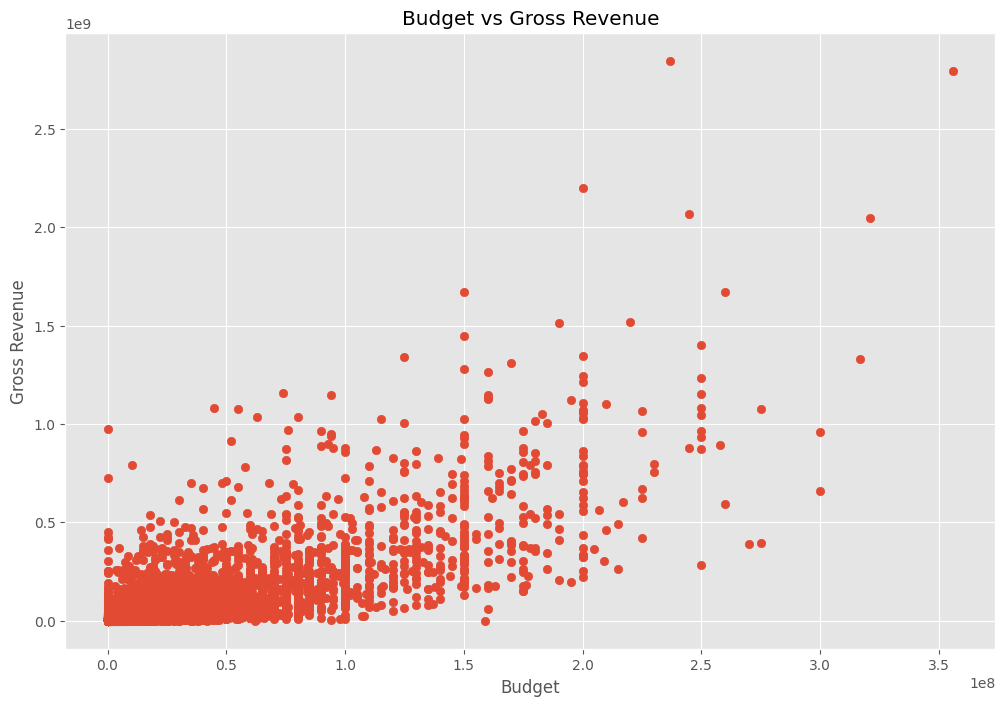

In [15]:
# Budget vs Gross should have high correlation?
# What other features are correlated with the Gross earnings?

# Scatter plot with Budget vs Gross Revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')

plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.show()

<AxesSubplot: xlabel='budget', ylabel='gross'>

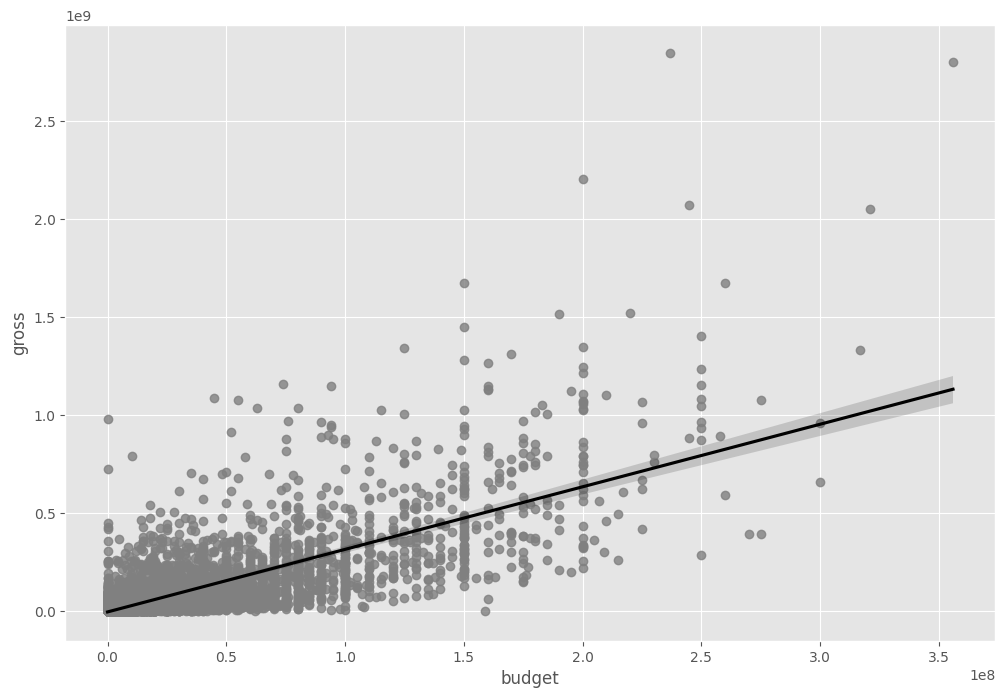

In [16]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'gray'}, line_kws={'color': 'black'})

In [17]:
# Looking at Correlation

df.corr(numeric_only= True)

# High correlation between budget & gross, groos & votes

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.997416
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.105821
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.218422
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.299876
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.254893
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
correct_year,0.997416,0.105821,0.218422,0.299876,0.254893,0.120636,1.000000


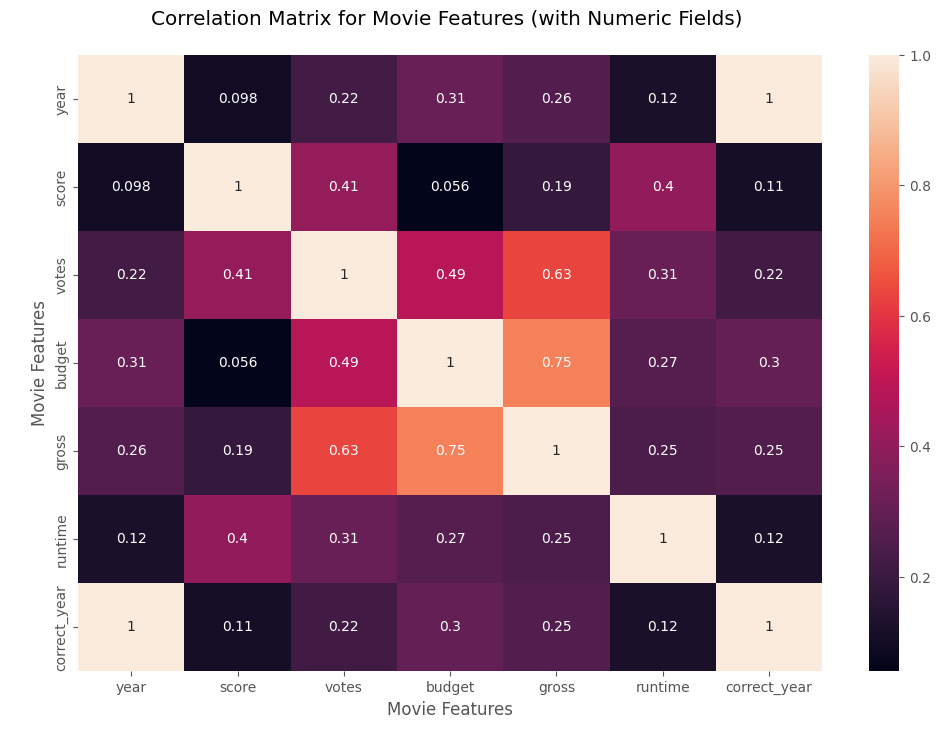

In [18]:
# Correlation Visuals

correlation_matrix = df.corr(numeric_only= True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Features (with Numeric Fields) \n')

plt.xlabel('Movie Features\n')
plt.ylabel('\nMovie Features')
plt.show()

In [19]:
# The gross earnings of a film is related the the number of votes it receives
# The gross earnings of a film is related to the film budget it receives; the more money spent on making a film, the higher its gross earnings

corr_pairs = correlation_matrix.unstack().sort_values()
corr_pairs[(corr_pairs) > 0.5]

votes         gross           0.632834
gross         votes           0.632834
              budget          0.750157
budget        gross           0.750157
correct_year  year            0.997416
year          correct_year    0.997416
              year            1.000000
budget        budget          1.000000
gross         gross           1.000000
votes         votes           1.000000
score         score           1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64